In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Make plots look nice
plt.style.use("seaborn-v0_8")



In [31]:
df = pd.read_csv("../data/cleaned/global_electricity_production_data.csv")
df.head()

,country_name,date,parameter,product,value,unit
0,Australia,2023-12-01,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,2023-12-01,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,2023-12-01,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,2023-12-01,Net Electricity Production,Oil and Petroleum Products,289.5415,GWh
4,Australia,2023-12-01,Net Electricity Production,Natural Gas,3091.9272,GWh


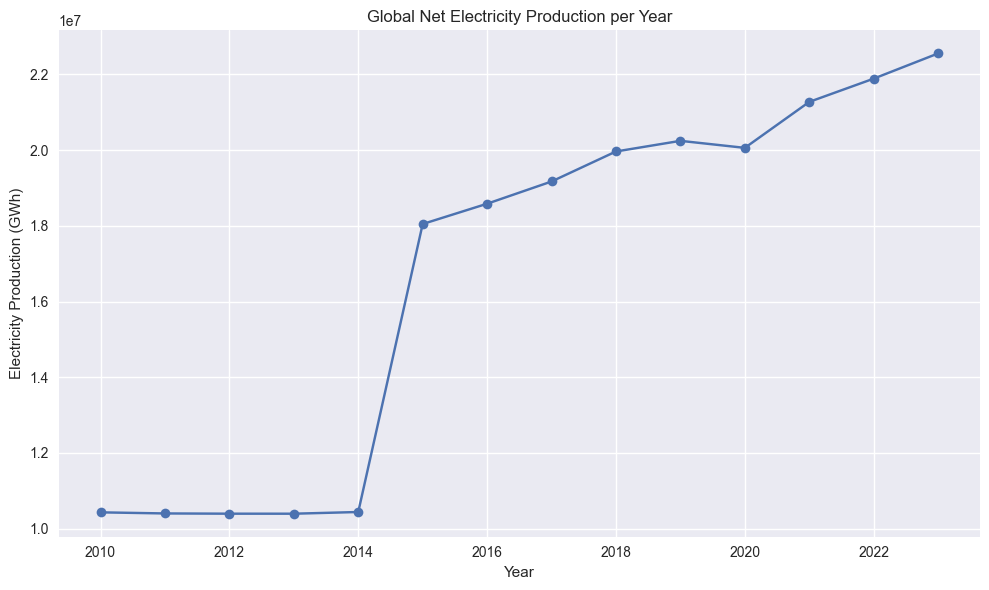

In [33]:
# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract year
df['year'] = df['date'].dt.year

# Filter for Net Electricity Production of Electricity
df_filtered = df[
    (df['parameter'] == 'Net Electricity Production') & 
    (df['product'] == 'Electricity')
]

# Group by year and sum the values
global_yearly_production = df_filtered.groupby('year')['value'].sum()

# Plot
plt.figure(figsize=(10, 6))
global_yearly_production.plot(kind='line', marker='o')
plt.title('Global Net Electricity Production per Year')
plt.xlabel('Year')
plt.ylabel('Electricity Production (GWh)')
plt.grid(True)
plt.tight_layout()
plt.show()


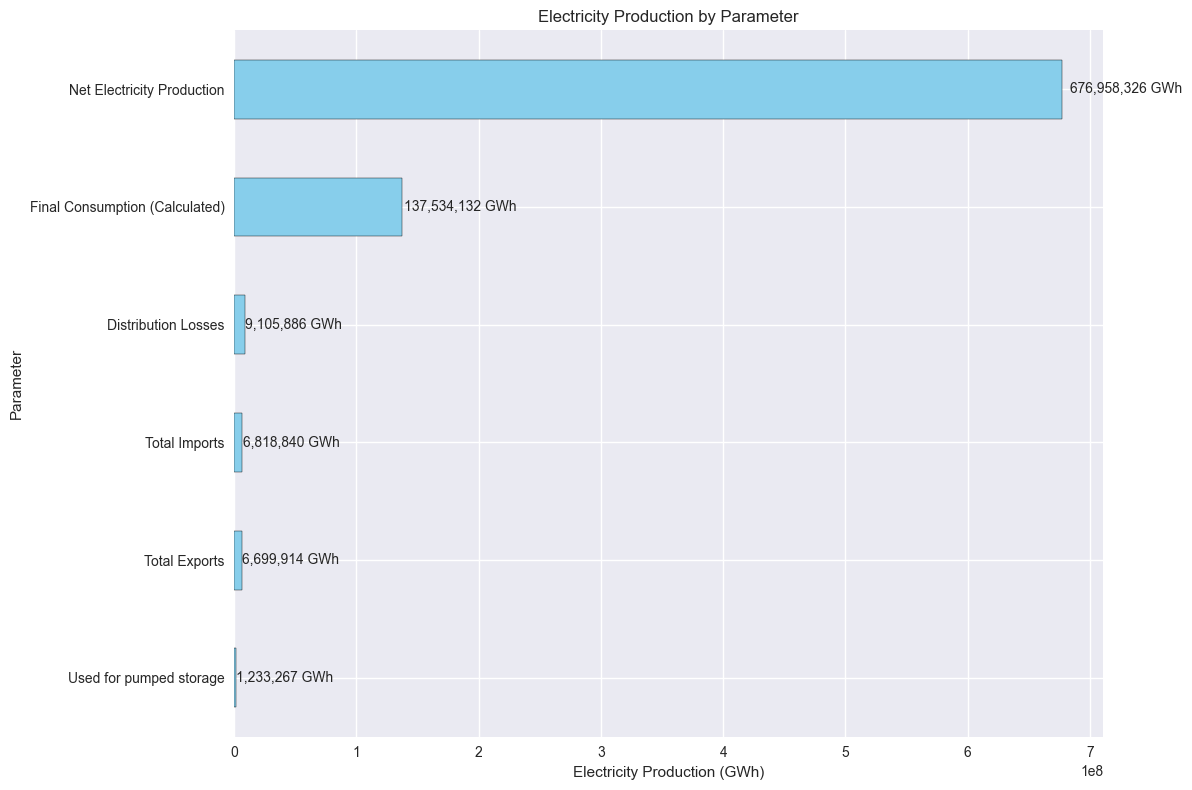

In [34]:
# Group by 'parameter' and sum the 'value' column
category_totals = df.groupby('parameter')['value'].sum().sort_values(ascending=False)

# Horizontal bar chart
plt.figure(figsize=(12, 8))
category_totals.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')

# Add labels on bars
for index, value in enumerate(category_totals.sort_values()):
    plt.text(value + 0.01*value, index, f"{value:,.0f} GWh", va='center')

plt.title('Electricity Production by Parameter')
plt.xlabel('Electricity Production (GWh)')
plt.ylabel('Parameter')
plt.tight_layout()
plt.show()


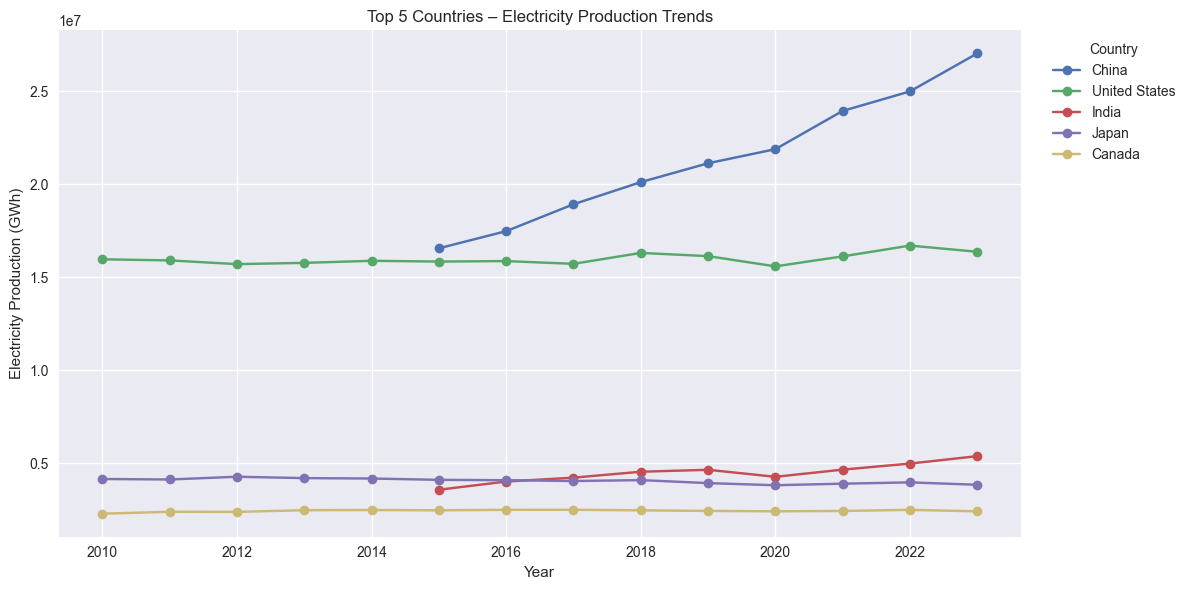

In [ ]:
# Get top 5 countries by total production (same as before)
top5_countries = (
    df.groupby("country_name")["value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter only those countries
top5_df = df[df["country_name"].isin(top5_countries)]

# Group by year and country, then unstack for plotting
top5_yearly = top5_df.groupby(["year", "country_name"])["value"].sum().unstack()

# Determine the order of countries based on the last available year
last_year = top5_yearly.index.max()
order = top5_yearly.loc[last_year].sort_values(ascending=False).index

# Reorder columns by last year’s ranking
top5_yearly = top5_yearly[order]

# Plot
ax = top5_yearly.plot(marker='o', figsize=(12, 6))

plt.title("Top 5 Countries – Electricity Production Trends")
plt.xlabel("Year")
plt.ylabel("Electricity Production (GWh)")
plt.grid(True)

# Legend ordered by last year's ranking
plt.legend(
    title="Country",
    loc="upper left",
    bbox_to_anchor=(1.02, 1),
    labels=order
)

plt.tight_layout()
plt.show()


Average Monthly Electricity Production (Top 5 Countries)


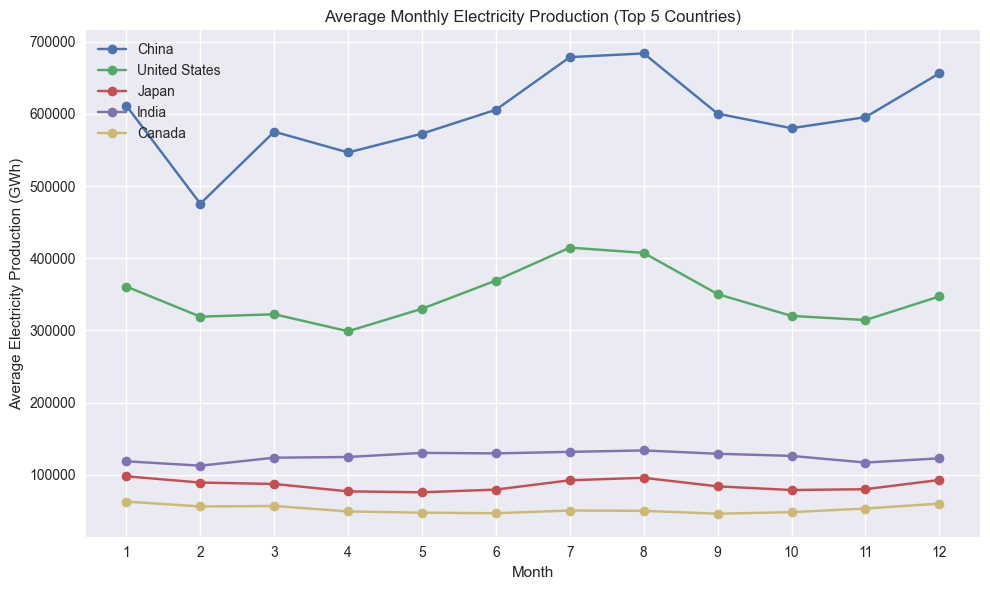

In [51]:
# Filter relevant entries (with .copy() to avoid SettingWithCopyWarning)
df_filtered = df[
    (df['parameter'] == 'Net Electricity Production') &
    (df['product'] == 'Electricity')
].copy()

# Ensure 'date' is datetime and extract year & month
df_filtered['date'] = pd.to_datetime(df_filtered['date'], errors='coerce')
df_filtered['year'] = df_filtered['date'].dt.year
df_filtered['month'] = df_filtered['date'].dt.month

# Get Top 5 countries by total production
top_5_countries = (
    df_filtered.groupby('country_name')['value']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter only Top 5 countries
df_top5 = df_filtered[df_filtered['country_name'].isin(top_5_countries)]

# Group by country & month, then calculate monthly average
monthly_avg = (
    df_top5.groupby(['country_name', 'month'])['value']
    .mean()
    .reset_index()
)

print("Average Monthly Electricity Production (Top 5 Countries)")

# Visualization
plt.figure(figsize=(10,6))
for country in top_5_countries:
    plt.plot(
        monthly_avg[monthly_avg['country_name'] == country]['month'],
        monthly_avg[monthly_avg['country_name'] == country]['value'],
        marker='o',
        label=country
    )

plt.title('Average Monthly Electricity Production (Top 5 Countries)')
plt.xlabel('Month')
plt.ylabel('Average Electricity Production (GWh)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fossil fuel components globally


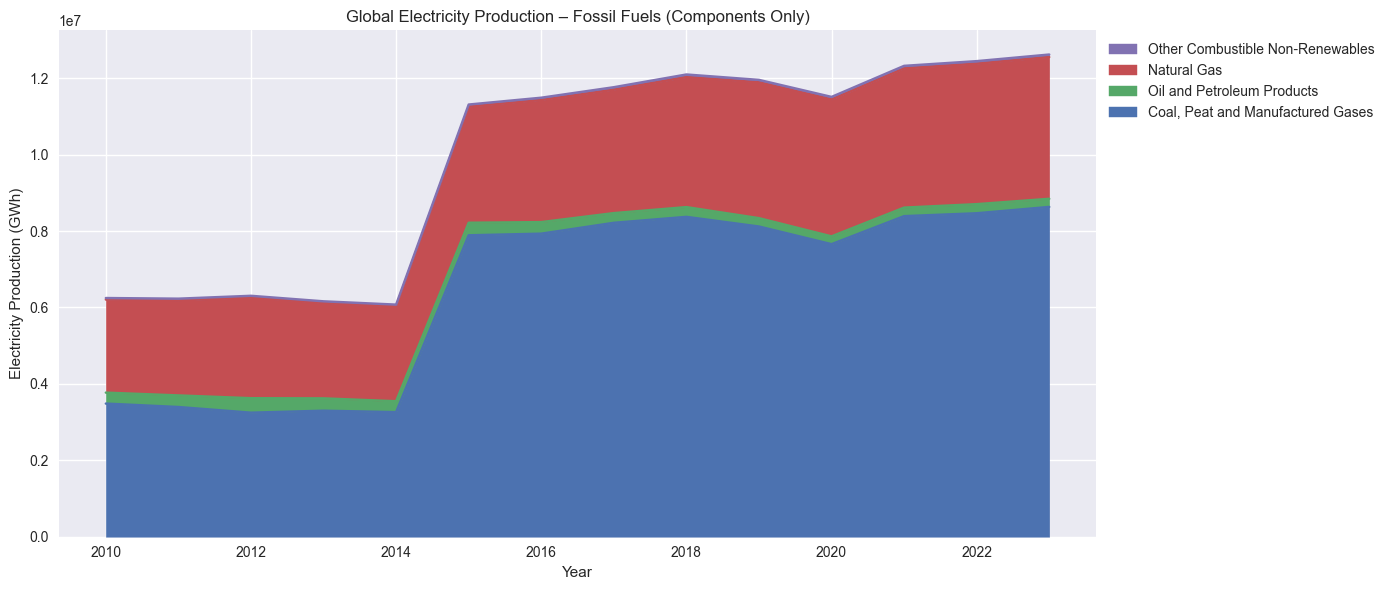

In [53]:
fossil_fuels = [
    'Coal, Peat and Manufactured Gases',
    'Oil and Petroleum Products',
    'Natural Gas',
    'Other Combustible Non-Renewables'
]

fossil_mix = df[df['product'].isin(fossil_fuels)]
fossil_mix = fossil_mix.groupby(["year", "product"])["value"].sum().unstack()
fossil_mix = fossil_mix[fossil_fuels].fillna(0)

print("Fossil fuel components globally")

ax = fossil_mix.plot.area(figsize=(14,6), stacked=True)
plt.title("Global Electricity Production – Fossil Fuels (Components Only)")
plt.xlabel("Year")
plt.ylabel("Electricity Production (GWh)")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

Renewable components globally


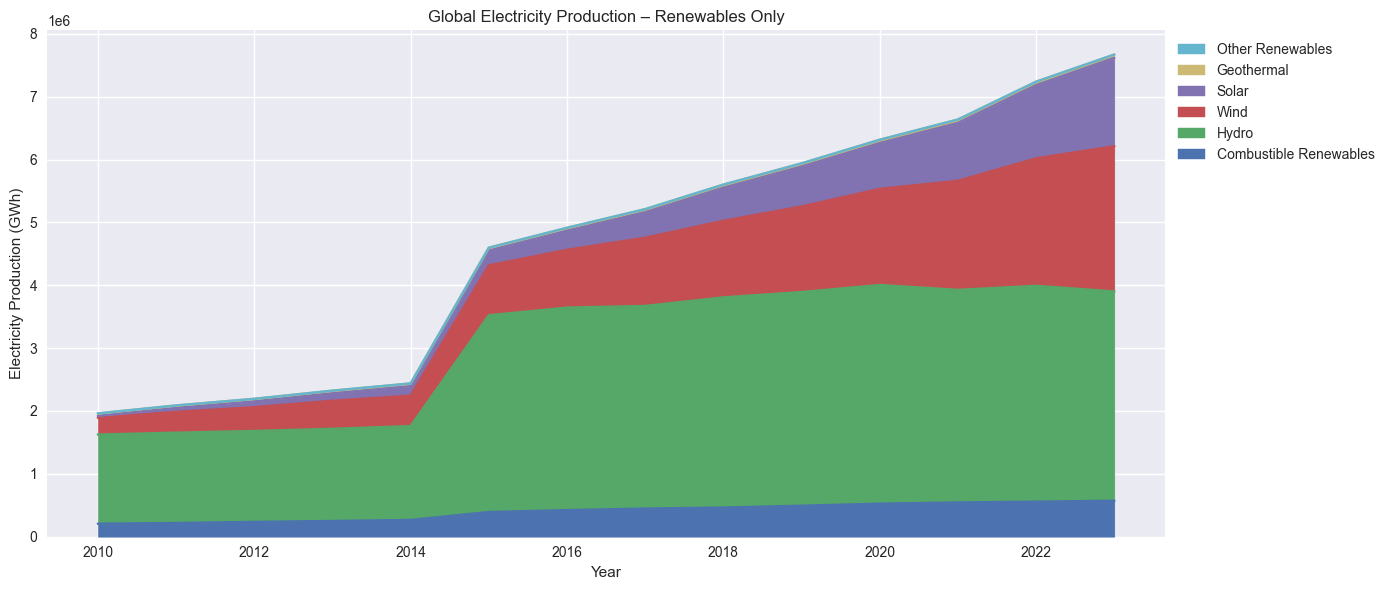

In [52]:
renewables = [
    'Combustible Renewables',
    'Hydro',
    'Wind',
    'Solar',
    'Geothermal',
    'Other Renewables',
]

renewable_mix = df[df['product'].isin(renewables)]
renewable_mix = renewable_mix.groupby(["year", "product"])["value"].sum().unstack()
renewable_mix = renewable_mix[renewables].fillna(0)

print("Renewable components globally")

ax = renewable_mix.plot.area(figsize=(14, 6), stacked=True)
plt.title("Global Electricity Production – Renewables Only")
plt.xlabel("Year")
plt.ylabel("Electricity Production (GWh)")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


Top 3 products globally (excluding all Totals and Electricity): ['Coal, Peat and Manufactured Gases', 'Natural Gas', 'Hydro']


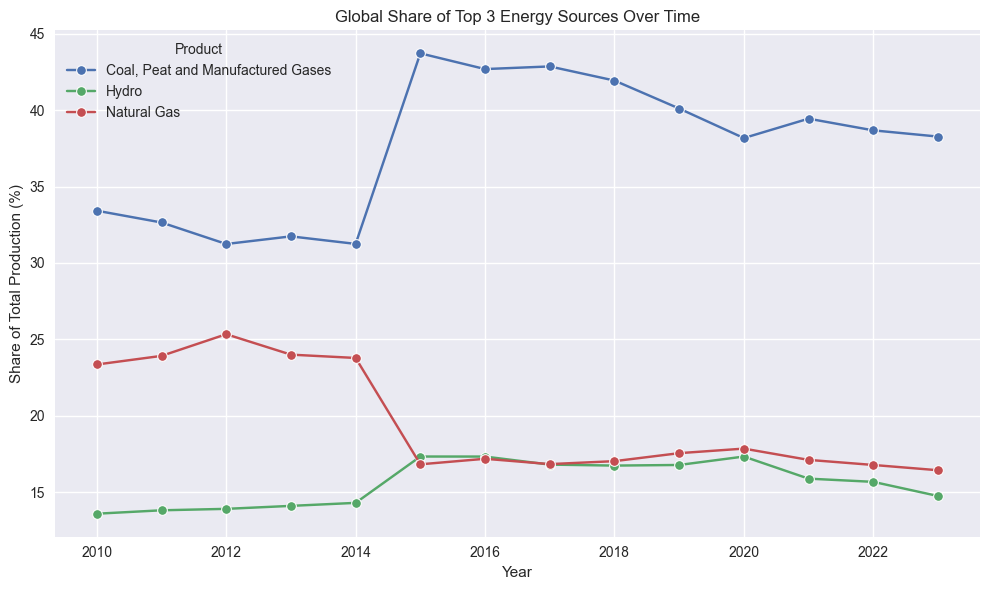

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude all aggregate products starting with "Total" or exactly "Electricity"
mask_real_sources = ~df["product"].str.contains(r"^(?:Electricity|Total)", case=False, na=False)
df_sources = df[mask_real_sources].copy()

# Top 3 products globally (sum over all years)
total_by_product = (
    df_sources.groupby("product")["value"]
    .sum()
    .sort_values(ascending=False)
)
top3_products = total_by_product.head(3).index.tolist()
print("Top 3 products globally (excluding all Totals and Electricity):", top3_products)

# Filter to those top 3 and compute yearly shares
df_top3 = df_sources[df_sources["product"].isin(top3_products)].copy()

yearly_totals = (
    df_top3.groupby(["year", "product"])["value"]
    .sum()
    .reset_index()
)

# Total per year across all real sources
total_per_year_all = (
    df_sources.groupby("year")["value"]
    .sum()
    .rename("total_value_all")
    .reset_index()
)

yearly_totals = yearly_totals.merge(total_per_year_all, on="year", how="left")
yearly_totals["share_percent"] = (
    yearly_totals["value"] / yearly_totals["total_value_all"] * 100
)

# Plot: share of top 3 products over time
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=yearly_totals,
    x="year",
    y="share_percent",
    hue="product",
    marker="o"
)
plt.title("Global Share of Top 3 Energy Sources Over Time")
plt.xlabel("Year")
plt.ylabel("Share of Total Production (%)")
plt.grid(True)
plt.legend(title="Product")
plt.tight_layout()
plt.show()


Total Renewables & Fossil Fuels produced globally each year


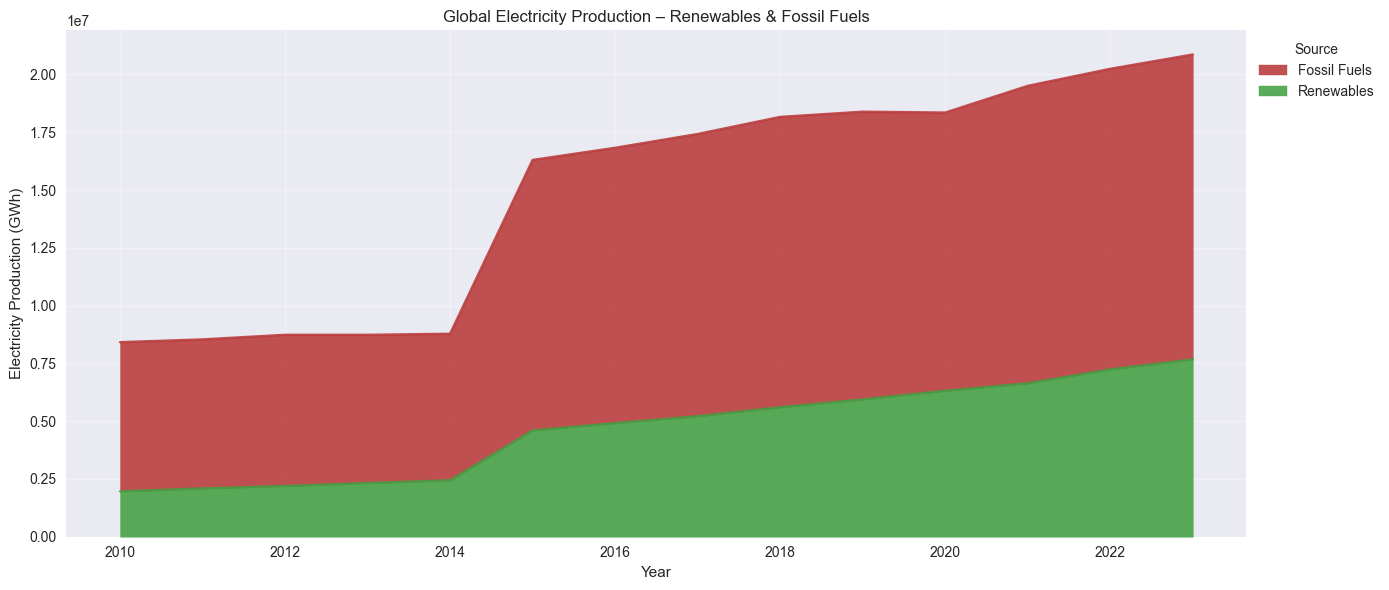

In [70]:
import matplotlib.pyplot as plt

renewables = [
    'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
    'Total Combustible Fuels'
]

renewable_mix = df[df['product'].isin(renewables)]
renewable_mix = renewable_mix.groupby(["year", "product"])["value"].sum().unstack()
renewable_mix = renewable_mix[renewables].fillna(0)

# Optional: rename for cleaner legend
renewable_mix.rename(columns={
    'Total Renewables (Hydro, Geo, Solar, Wind, Other)': 'Renewables',
    'Total Combustible Fuels': 'Fossil Fuels'
}, inplace=True)

print("Total Renewables & Fossil Fuels produced globally each year")

# Plot with distinct colors
colors = ["#42a042df", "#b93939df"]  # green for renewables, red for fossil fuels
ax = renewable_mix.plot.area(figsize=(14, 6), stacked=True, color=colors)

plt.title("Global Electricity Production – Renewables & Fossil Fuels")
plt.xlabel("Year")
plt.ylabel("Electricity Production (GWh)")
plt.grid(alpha=0.3)

# Reverse legend order and place outside
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], loc="upper left", bbox_to_anchor=(1, 1), title="Source")

plt.tight_layout()
plt.show()


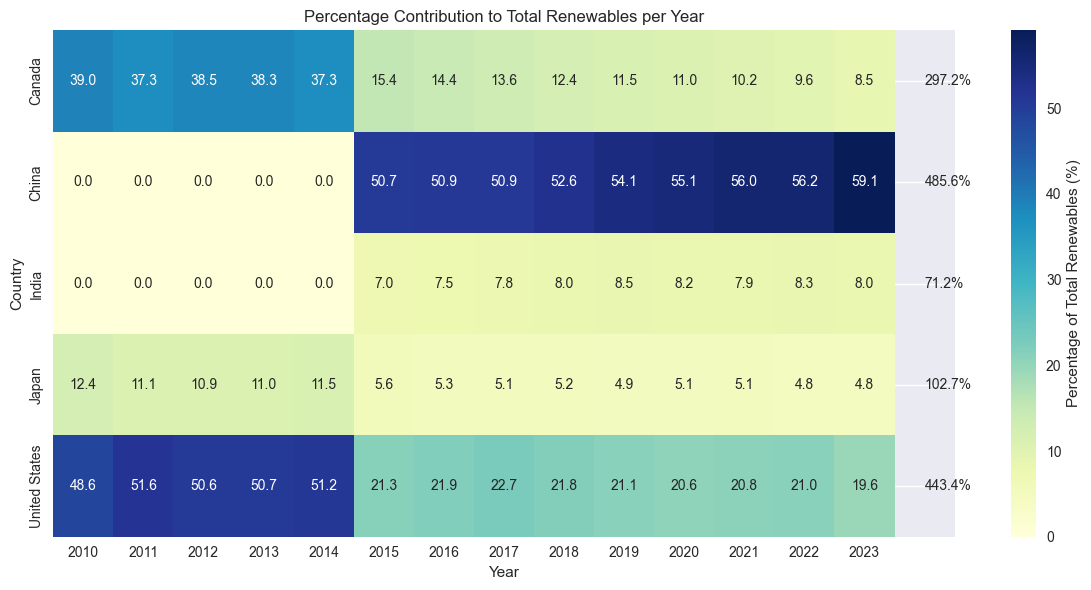

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter top 5 countries
top5_countries = top5_yearly.columns  # assuming top5_yearly already exists

# Filter only Total Renewables for top 5 countries
top5_renewables = df[
    (df['country_name'].isin(top5_countries)) &
    (df['product'] == 'Total Renewables (Hydro, Geo, Solar, Wind, Other)')
].copy()

# Aggregate values per country per year
top5_renewables_agg = top5_renewables.groupby(['year', 'country_name'])['value'].sum().reset_index()

# Pivot to have countries as rows, years as columns
top5_renewables_pivot = top5_renewables_agg.pivot(index='country_name', columns='year', values='value').fillna(0)

# Ensure all values are numeric
top5_renewables_pivot = top5_renewables_pivot.apply(pd.to_numeric)

# Convert to percentages per year
country_years_percent = top5_renewables_pivot.div(top5_renewables_pivot.sum(axis=0), axis=1) * 100

# Calculate Total per country
country_totals = country_years_percent.sum(axis=1).round(1)

# Heatmap without Total column
plt.figure(figsize=(12,6))
sns.heatmap(country_years_percent, annot=True, fmt=".1f", cmap="YlGnBu",
            cbar_kws={'label': 'Percentage of Total Renewables (%)'})

# Add Total values as text on the right
for i, total in enumerate(country_totals):
    plt.text(len(country_years_percent.columns) + 0.5, i + 0.5, f'{total:.1f}%', 
             va='center', ha='left', fontsize=10)

plt.title("Percentage Contribution to Total Renewables per Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.xlim(0, len(country_years_percent.columns)+1)  # Extend x-axis for total
plt.tight_layout()
plt.show()


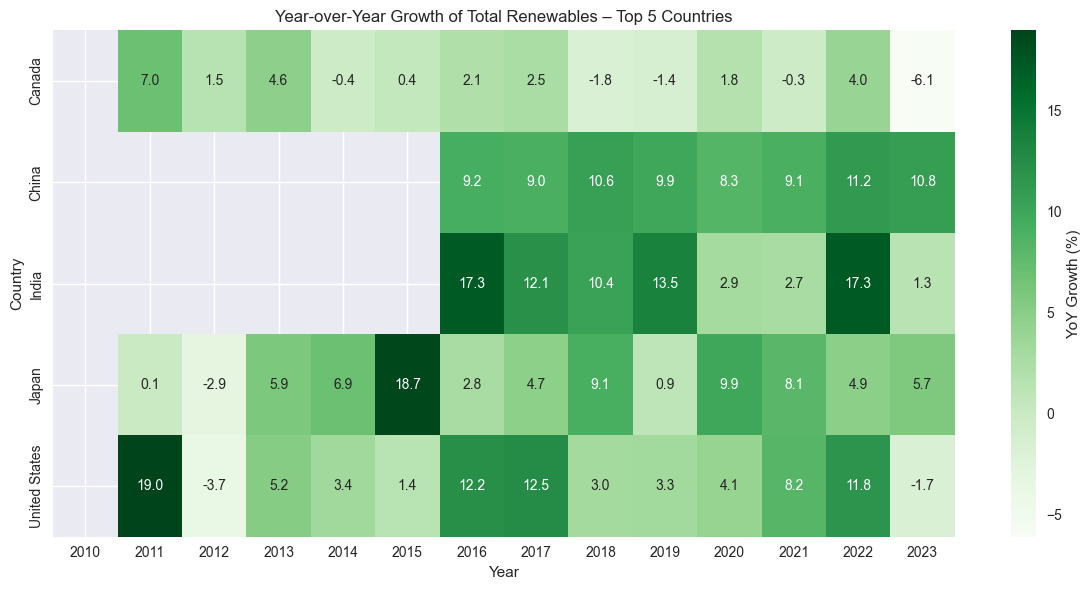

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter top 5 countries and Total Renewables
top5_renewables = df[
    (df['country_name'].isin(top5_yearly.columns)) &
    (df['product'] == 'Total Renewables (Hydro, Geo, Solar, Wind, Other)')
].copy()

# Aggregate values per country per year
top5_renewables_agg = top5_renewables.groupby(['year', 'country_name'])['value'].sum().reset_index()

# Pivot to have years as rows and countries as columns
top5_renewables_pivot = top5_renewables_agg.pivot(index='year', columns='country_name', values='value').fillna(0)

# Calculate YoY growth (%) safely by ignoring zeros in previous year
renewables_growth = top5_renewables_pivot.copy()
renewables_growth = renewables_growth.pct_change() * 100

# Replace infinite values (from division by zero) with NaN
renewables_growth.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# Optional: clip extreme values for better visualization
renewables_growth = renewables_growth.clip(lower=-50, upper=150)  # adjust if needed

# Plot heatmap for comparison
plt.figure(figsize=(12,6))
sns.heatmap(renewables_growth.T, annot=True, fmt=".1f", cmap="Greens",
            cbar_kws={'label': 'YoY Growth (%)'})
plt.title("Year-over-Year Growth of Total Renewables – Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()
